<a href="https://colab.research.google.com/github/LuOrdonez/Portfolio/blob/Estad%C3%ADstica/estimacion_de_parametros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import matplotlib
from scipy.optimize import curve_fit


#estos son parametros para los gráficos, son modificables global y localmente
plt.rcParams.update({'legend.fontsize': 22})
plt.rcParams.update({'axes.titlesize': 22})
plt.rcParams.update({'axes.labelsize': 28})
plt.rcParams.update({'ytick.labelsize': 24})
plt.rcParams.update({'xtick.labelsize': 24})
plt.rcParams.update({'legend.loc':"best"})
plt.rcParams.update({"figure.figsize": [9, 7]})
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['axes.grid'] = True
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['font.size'] = 20

In [ ]:
#distribuciones
def gauss(x, mu, sigma):
    return 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(x-mu)**2/(2*sigma**2))
def chi_cuad(x, n):
    return (((1/2)**(n/2))/scipy.special.gamma(n/2))*x**(n/2-1)*np.exp(-x/2)
def t_student(x,n):
   return (scipy.special.gamma((n+1)/2)/(scipy.special.gamma(n/2)*np.sqrt(n*np.pi)))*(1+(x**2)/n)**(-(n+1)/2)


#estimadores útiles
def S_cuad(x):
    return np.sum((x-10)**2)/len(x) #en caso de conocer el mu
def s_cuad(x):
    return np.sum((x-np.mean(x))**2)/(len(x)-1) #en caso de no conocerlo

#**Ejercicio 4**


Usando un generador de números aleatorios gaussianos $N(\mu, \sigma)$, con $\mu = 10 $ y
$\sigma = 2$, genere 1000 ternas {$x_1,x_2,x_3$}.

 a) Para cada terna calcule los valores de $\sqrt{n}(\bar{x} - \mu)/ \sigma, n S^2/\sigma^2, (n-1)s^2/\sigma^2, \sqrt{n}(\bar{x}- \mu)/s$ (con n=3). Confeccione un histograma normalizado para cada una de las cuatro variables, y superpóngale la correspondiente distribución teórica (respectivamente $N(0,1), \chi_3^2, \chi_2^2, t_{(2)}$)


 b) Para cada terna calcule el intervalo de 95% de nivel de confianza para $\sigma^2$, suponiendo primero que $\mu$ es conocido y luego que no lo es. En ambos casos, verifique cuantas veces el verdadero valor de queda comprendido dentro del correspondiente intervalo de confianza. En general, este número no será exactamente 95%. Analice si la diferencia obtenida es consistente con la fluctuación binomial esperada. ¿Por qué es binomial la fluctuación?


 c) Para cada terna, calcule el intervalo de 95% de nivel de confianza para $\mu$, suponiendo primero que $\sigma^2$ es conocido y luego que no lo es. En ambos casos, verifique cuantas veces el verdadero valor de queda comprendido dentro del correspondiente intervalo de confianza. Analice si la diferencia obtenida es consistente con la fluctuación binomial esperada.

Genero las ternas

In [ ]:
mu = 10
sigma = 2
n = 3
var = 4

x1 = scipy.stats.norm.rvs(mu, sigma, size=1000)
x2 = scipy.stats.norm.rvs(mu, sigma, size=1000)
x3 = scipy.stats.norm.rvs(mu, sigma, size=1000)

x = []
for i in range(1000):
    x.append([x1[i], x2[i], x3[i]])
x = np.array(x)


## inciso a

Calculo las variables que me piden

In [ ]:
uno = []
dos = []
tres = []
cuatro = []

for i in range(1000):
    a = np.sqrt(len(x[i]))*(np.mean(x[i])-10)/sigma
    b = len(x[i])*S_cuad(x[i])/sigma**2
    c = (len(x[i])-1)*s_cuad(x[i])/sigma**2
    d = np.sqrt(len(x[i]))*(np.mean(x[i])-10)/np.sqrt(s_cuad(x[i]))
    uno.append(a)
    dos.append(b)
    tres.append(c)
    cuatro.append(d)


Hago histogramas de cada variable superponiendolo con la predicción teorica

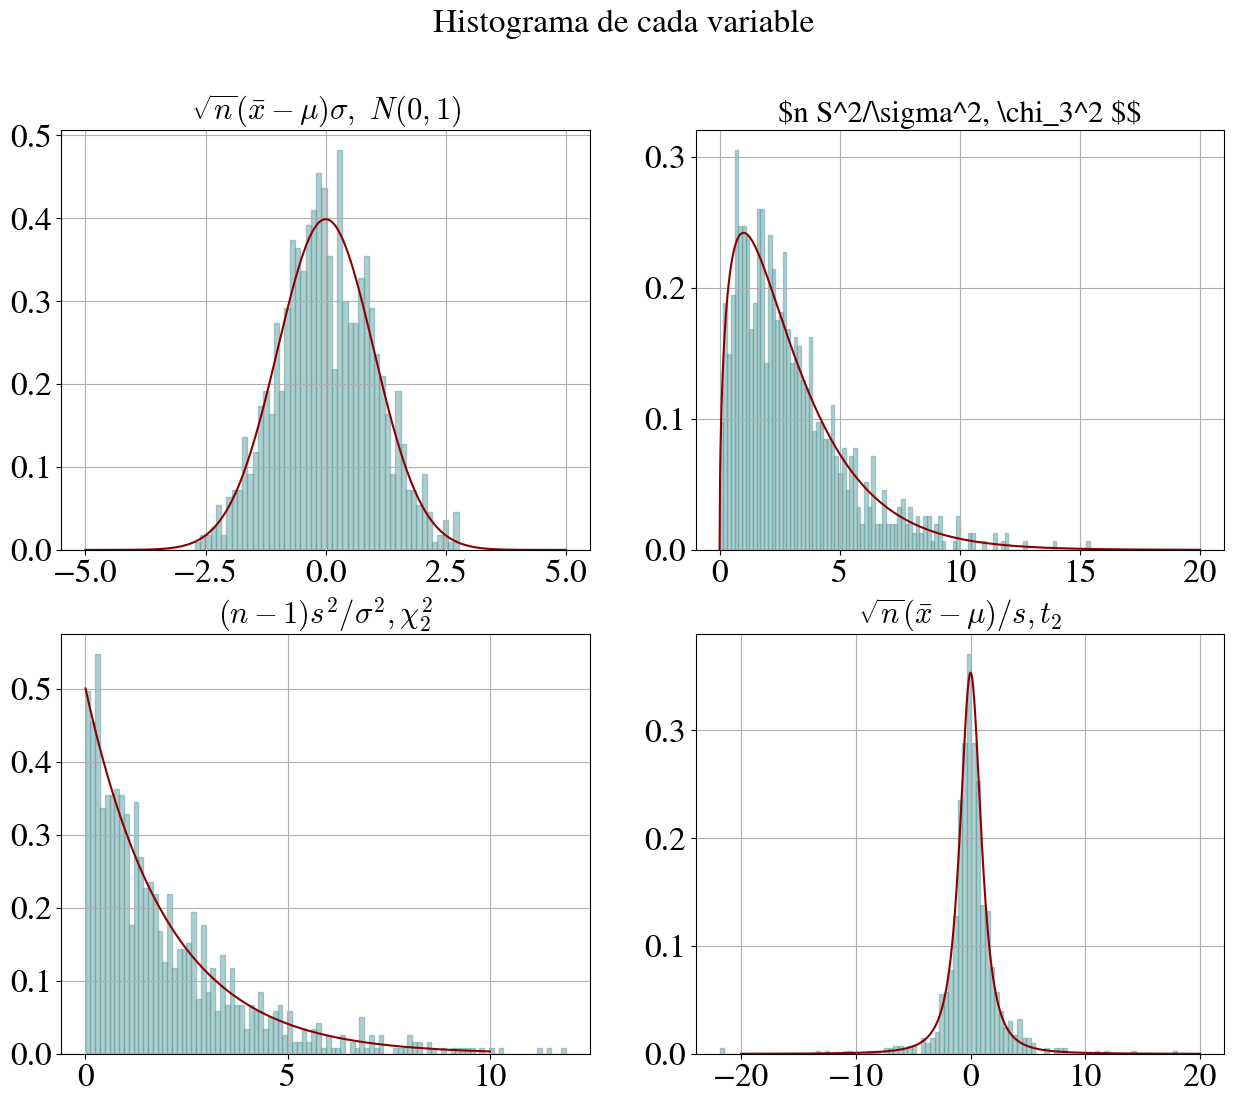

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(15,12))
fig.suptitle('Histograma de cada variable')


axs[0, 0].hist(uno, bins=50, density = True, color = 'cadetblue', alpha = 0.5, edgecolor = 'cadetblue')
axs[0,0].plot(np.linspace(-5,5,1000), gauss(np.linspace(-5,5,1000),0,1), color = 'darkred')
axs[0, 0].set_title(r'$\sqrt{n}(\bar{x} - \mu)\sigma,\ N(0,1)$')


axs[0,1].hist(dos, bins=100, density = True, color = 'cadetblue', alpha = 0.5, edgecolor = 'cadetblue')
axs[0,1].plot(np.linspace(0,20,1000), chi_cuad(np.linspace(0,20,1000),3), color = 'darkred')
axs[0,1].set_title('$n S^2/\sigma^2, \chi_3^2 $$')


axs[1,0].hist(tres, bins=100, density = True, color = 'cadetblue', alpha = 0.5, edgecolor = 'cadetblue')
axs[1,0].set_title('$(n-1)s^2/\sigma^2, \chi_2^2 $')
axs[1,0].plot(np.linspace(0,10,1000), chi_cuad(np.linspace(0,10,1000),2), color = 'darkred')



axs[1,1].hist(cuatro, bins=100, density = True, color = 'cadetblue', alpha = 0.5, edgecolor = 'cadetblue')
axs[1,1].set_title(r'$\sqrt{n}(\bar{x}- \mu)/s, t_2$')
axs[1,1].plot(np.linspace(-20,20,1000), t_student(np.linspace(-20,20,1000),2), color = 'darkred')


plt.show()

## inciso b

Calculo los intervalos de confianza con 95% de CL para $\sigma^2$ considerando $\mu$ conocido o desconocido y me fijo cuántas veces entra el valor real

In [ ]:
#de la tabla de chi cuadrado, las cuentas para los extremos estan en el cuaderno

#saco esta cuenta de pedir que la probabilidad por fuera del intervalo sea simetrica para arriba y para abajo

extremo_sup_cono = 9.348
extremo_inf_cono = 0.2158


extremo_sup_desc = 7.378
extremo_inf_desc = 0.0506


exitos_mu_conocido = []
exitos_mu_desconocido = []

for i in range(1000):

    #defino las cotas para los intervalos de sigma en caso de conocer mu y no
    #las expresiones salen según el estimador que uso en cada caso

    cota_inf_cono = S_cuad(x[i])*n/extremo_sup_cono
    cota_sup_cono = S_cuad(x[i])*n/extremo_inf_cono

    cota_inf_desc = s_cuad(x[i])*(n-1)/extremo_sup_desc
    cota_sup_desc = s_cuad(x[i])*(n-1)/extremo_inf_desc

    #me fijo si la varianza real está contenida en el intervalo y appendeo 1 si sucede
    if var >= cota_inf_cono and var <= cota_sup_cono:
        exitos_mu_conocido.append(1)
    else:
        continue
    if var >= cota_inf_desc and var <= cota_sup_desc:
        exitos_mu_desconocido.append(1)
    else:
        continue

print(f'con valor medio conocido el {len(exitos_mu_conocido)/10}% de las veces la varianza entra en el intervalo calculado')
print(f'con valor medio desconocido el {len(exitos_mu_desconocido)/10}% de las veces la varianza entra en el intervalo calculado')

con valor medio conocido el 95.7% de las veces la varianza entra en el intervalo calculado
con valor medio desconocido el 92.8% de las veces la varianza entra en el intervalo calculado


Analizo si la fluctuación en los valores es consistente con la binomial esperada.

Dado que la probabilidad de estar o no contenido en el intervalo puede pensarse como un experimento de Bernoulli, la probabilidad de exito esta dada por una binomial $B_k(k | n=1000, p=0.95)$.

Por el Teorema Central del Límite, puedo considerar que como el n es grande la distribución tiende a ser una gaussiana y por lo tanto, el intervalo de confianza para la cantidad de exitos puede ser modelada con un 68% de CL por $(E(k) \pm \sqrt{VAR(k)})$

En una binomial, $E(k) = np$ y $VAR(k) = np(1-p)$

In [ ]:
p = 0.95
cantidad = 1000

E = cantidad*p
varianza = cantidad*p*(1-p)

cota_inf_esperado = E - np.sqrt(varianza)
cota_sup_esperado = E + np.sqrt(varianza)

print(f'La cantidad de veces que espero que el intervalo calculado contenga al valor real es ({cota_inf_esperado:.2f}, {cota_sup_esperado:.2f})')
print(f'En el caso de conocer el valor medio, la cantidad de extos fue {len(exitos_mu_conocido)}')
print(f'En el caso de no conocer el valor medio, la cantidad de extos fue {len(exitos_mu_desconocido)}')

La cantidad de veces que espero que el intervalo calculado contenga al valor real es (943.11, 956.89)
En el caso de conocer el valor medio, la cantidad de extos fue 957
En el caso de no conocer el valor medio, la cantidad de extos fue 928


## inciso c

Calculo los intervalos de confianza con un 95% de CL para $\mu$ considerando $\sigma^2$ conocido o desconocido y calculo la cantidad de veces que el valor verdadero entra en el intervalo.



In [ ]:
valor = 4.3027

exitos_sigma_conocido = []
exitos_sigma_desconocido = []

for i in range(1000):
    #defino las cotas para los intervalos de sigma en caso de conocer mu y no
    #las expresiones salen según el estimador que uso en cada caso

    cota_inf_cono = np.mean(x[i])-2*sigma/np.sqrt(n)
    cota_sup_cono = np.mean(x[i])+2*sigma/np.sqrt(n)

    cota_inf_desc = np.mean(x[i])-valor*np.sqrt(s_cuad(x[i])/n)
    cota_sup_desc = np.mean(x[i])+valor*np.sqrt(s_cuad(x[i])/n)

    #me fijo si la varianza real está contenida en el intervalo y appendeo 1 si sucede
    if mu >= cota_inf_cono and var <= cota_sup_cono:
        exitos_sigma_conocido.append(1)
    else:
        continue
    if mu >= cota_inf_desc and var <= cota_sup_desc:
        exitos_sigma_desconocido.append(1)
    else:
        continue

print(f'con varianza conocida el {len(exitos_sigma_conocido)/10}% de las veces el valor medio entra en el intervalo calculado')
print(f'con varianza desconocida el {len(exitos_sigma_desconocido)/10}% de las veces el valor medio entra en el intervalo calculado')

con varianza conocida el 97.2% de las veces el valor medio entra en el intervalo calculado
con varianza desconocida el 94.5% de las veces el valor medio entra en el intervalo calculado
